## Import dependencies and tools, plust review data

In [92]:
# Supervised Learning Dependencies
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn import preprocessing
from sklearn import utils
# Unsupervised
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# Neural Network
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf

In [93]:
# Import machine learning csv made in postgreSQL as DataFrame
ml_df = pd.read_csv("full_table.csv").set_index('cust')
ml_df

,monthly_bill,tax_body,biz_type,compost,garbage,recycle,total_yards,needed_recycle,needed_compost,enough_recycle_compost
cust,,,,,,,,,,
98,888.98,C,MINI MART,0.00,4.00,16.00,20.00,2,1,No
98,888.98,C,MINI MART,0.00,4.00,16.00,20.00,2,1,No
98,888.98,C,MINI MART,0.00,4.00,16.00,20.00,2,1,No
218,965.40,COUNTY,WINERY,0.48,4.00,5.44,9.92,2,1,No
218,965.40,COUNTY,WINERY,0.48,4.00,5.44,9.92,2,1,No
...,...,...,...,...,...,...,...,...,...,...
31675,134.57,COUNTY,LODGING-FW,0.48,0.48,0.48,1.44,0,0,Yes
31676,1456.25,COUNTY,WINERY,0.00,2.00,6.00,8.00,1,1,No
31676,1456.25,COUNTY,WINERY,0.00,2.00,6.00,8.00,1,1,No


In [94]:
# Determine number of unique values in each column, and check for dtypes and information while I'm at it
ml_df.nunique()

monthly_bill              227
tax_body                    4
biz_type                   40
compost                    38
garbage                    44
recycle                    81
total_yards               168
needed_recycle             21
needed_compost             17
enough_recycle_compost      2
dtype: int64

In [95]:
ml_df.dtypes

monthly_bill              float64
tax_body                   object
biz_type                   object
compost                   float64
garbage                   float64
recycle                   float64
total_yards               float64
needed_recycle              int64
needed_compost              int64
enough_recycle_compost     object
dtype: object

In [96]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1768 entries, 98 to 31679
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   monthly_bill            1768 non-null   float64
 1   tax_body                1768 non-null   object 
 2   biz_type                1768 non-null   object 
 3   compost                 1768 non-null   float64
 4   garbage                 1768 non-null   float64
 5   recycle                 1768 non-null   float64
 6   total_yards             1768 non-null   float64
 7   needed_recycle          1768 non-null   int64  
 8   needed_compost          1768 non-null   int64  
 9   enough_recycle_compost  1768 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 151.9+ KB


In [97]:
# Drop duplicates
ml_df.drop_duplicates(inplace=True)
ml_df

,monthly_bill,tax_body,biz_type,compost,garbage,recycle,total_yards,needed_recycle,needed_compost,enough_recycle_compost
cust,,,,,,,,,,
98,888.98,C,MINI MART,0.00,4.00,16.00,20.00,2,1,No
218,965.40,COUNTY,WINERY,0.48,4.00,5.44,9.92,2,1,No
345,890.40,COUNTY,WINERY,0.00,4.00,0.00,4.00,2,1,No
567,97.87,S,MEDICAL,0.00,0.48,0.48,0.96,0,0,Yes
717,65.25,S,GROCERY,0.00,0.32,0.48,0.80,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...
31644,335.71,S,MULTIFAMIL,0.96,0.96,0.96,2.88,0,0,Yes
31660,134.57,COUNTY,MIXED USE,0.48,0.48,0.48,1.44,0,0,Yes
31675,134.57,COUNTY,LODGING-FW,0.48,0.48,0.48,1.44,0,0,Yes


In [98]:
# Restructure the three df's so it's easier to compare services
ml_df = ml_df[['monthly_bill', 'tax_body', 'biz_type', 'total_yards','garbage', 'recycle', 'needed_recycle', 'compost', 'needed_compost', 'enough_recycle_compost']]
ml_df

,monthly_bill,tax_body,biz_type,total_yards,garbage,recycle,needed_recycle,compost,needed_compost,enough_recycle_compost
cust,,,,,,,,,,
98,888.98,C,MINI MART,20.00,4.00,16.00,2,0.00,1,No
218,965.40,COUNTY,WINERY,9.92,4.00,5.44,2,0.48,1,No
345,890.40,COUNTY,WINERY,4.00,4.00,0.00,2,0.00,1,No
567,97.87,S,MEDICAL,0.96,0.48,0.48,0,0.00,0,Yes
717,65.25,S,GROCERY,0.80,0.32,0.48,0,0.00,0,Yes
...,...,...,...,...,...,...,...,...,...,...
31644,335.71,S,MULTIFAMIL,2.88,0.96,0.96,0,0.96,0,Yes
31660,134.57,COUNTY,MIXED USE,1.44,0.48,0.48,0,0.48,0,Yes
31675,134.57,COUNTY,LODGING-FW,1.44,0.48,0.48,0,0.48,0,Yes


## Unsupervised Model

I am pretty sure I know what I am planning to do with the data, but just in case I'm going to see what relationships the data has

In [101]:
# Starting with unsupervised learning to see what relationships there may be with the data
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(ml_df, columns= ["tax_body", "biz_type", "enough_recycle_compost"])
X.head()

,monthly_bill,total_yards,garbage,recycle,needed_recycle,compost,needed_compost,tax_body_C,tax_body_COUNTY,tax_body_S,...,biz_type_PRESCHOOL,biz_type_RESTAURANT,biz_type_RETAIL,biz_type_SCHOOL,biz_type_STRIP MALL,biz_type_UTILITY,biz_type_VINEYARD,biz_type_WINERY,enough_recycle_compost_No,enough_recycle_compost_Yes
cust,,,,,,,,,,,,,,,,,,,,,
98,888.98,20.00,4.00,16.00,2,0.00,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
218,965.40,9.92,4.00,5.44,2,0.48,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
345,890.40,4.00,4.00,0.00,2,0.00,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
567,97.87,0.96,0.48,0.48,0,0.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
717,65.25,0.80,0.32,0.48,0,0.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [102]:
X = StandardScaler().fit_transform(X)
X

array([[-0.03577655,  0.17607197, -0.11787185, ..., -0.63575246,
         0.99752168, -0.99752168],
       [ 0.02343194, -0.13475076, -0.11787185, ...,  1.57293926,
         0.99752168, -0.99752168],
       [-0.03467636, -0.31729744, -0.11787185, ...,  1.57293926,
         0.99752168, -0.99752168],
       ...,
       [-0.62027637, -0.39623654, -0.39387511, ..., -0.63575246,
        -1.00248448,  1.00248448],
       [ 0.40373143, -0.19395509, -0.27469188, ...,  1.57293926,
         0.99752168, -0.99752168],
       [-0.67398394, -0.41597132, -0.40642071, ...,  1.57293926,
        -1.00248448,  1.00248448]])

In [103]:
pca = PCA(n_components = 3)
df_pca=pca.fit_transform(X)

In [104]:
# Create a DataFrame with the three principal components.
pcs_df= pd.DataFrame(data=df_pca, columns=["PC 1", "PC 2", "PC 3"], index = ml_df.index)
pcs_df.head(10)

,PC 1,PC 2,PC 3
cust,,,
98,0.303533,-0.271506,-2.773047
218,-0.027026,-2.486713,0.440175
345,-0.234493,-2.529222,0.338003
567,-1.525110,1.844554,0.010659
717,-0.446379,1.886757,-0.315264
767,-1.359978,-0.858719,1.939482
800,-1.028501,-0.891742,1.978001
806,-0.414992,-2.510524,0.359851
939,-1.388002,1.999442,0.072832


In [105]:
inertia = []
k = list(range(1, 11))
# Looking for the best K
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)
# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [106]:
# Initialize the K-means model
model = KMeans(n_clusters=4, random_state=5)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
print(predictions)

[1 2 2 0 0 2 2 2 0 1 2 2 2 0 1 2 2 2 0 2 2 2 0 1 0 2 2 0 2 2 2 2 2 2 2 0 2
 2 0 0 2 1 2 0 2 0 0 0 2 2 2 2 0 0 0 0 0 2 0 0 2 2 0 0 2 2 1 0 1 0 2 1 2 0
 0 0 2 2 1 2 2 2 0 2 2 2 0 1 2 0 0 0 2 0 1 0 1 0 2 2 2 2 0 2 1 1 0 1 0 3 1
 0 1 0 0 0 1 0 3 0 3 1 1 2 0 0 0 1 3 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 3 1
 2 1 1 1 1 1 0 0 1 1 1 1 0 3 1 0 0 0 0 1 2 2 2 2 2 2 2 2 2 2 0 2 2 0 1 2 2
 2 2 2 0 2 0 2 2 2 2 0 2 3 0 2 1 1 1 1 2 2 2 2 0 2 1 2 1 0 2 1 0 2 2 0 0 3
 0 2 2 0 1 0 0 0 2 1 2 2 0 0 1 1 2 0 2 2 2 3 0 1 2 2 0 2 2 2 0 1 2 0 1 3 1
 1 2 2 0 0 2 0 0 2 1 1 0 0 0 2 2 0 2 1 0 0 0 0 2 2 2 2 0 0 0 2 0 1 0 0 0 0
 1 3 2 2 2 0 3 0 2 0 2 2 1 1 0 2 0 1 2 2 0 1 0 2 0 0 0 2 0 2 0 0 0 0 2 2 0
 2 2 1 0 3 2 2 0 2 1 0 1 0 1 1 1 2 0 0 0 2 0 2 0 0 2 0 0 0 1 1 3 2 0 1 1 1
 0 0 1 1 0 2 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 2 0 2 2 0 0 0 0 2 0]


In [107]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([ml_df, pcs_df], axis = 1)
#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(403, 14)


,monthly_bill,tax_body,biz_type,total_yards,garbage,recycle,needed_recycle,compost,needed_compost,enough_recycle_compost,PC 1,PC 2,PC 3,Class
cust,,,,,,,,,,,,,,
98,888.98,C,MINI MART,20.00,4.00,16.00,2,0.00,1,No,0.303533,-0.271506,-2.773047,1
218,965.40,COUNTY,WINERY,9.92,4.00,5.44,2,0.48,1,No,-0.027026,-2.486713,0.440175,2
345,890.40,COUNTY,WINERY,4.00,4.00,0.00,2,0.00,1,No,-0.234493,-2.529222,0.338003,2
567,97.87,S,MEDICAL,0.96,0.48,0.48,0,0.00,0,Yes,-1.525110,1.844554,0.010659,0
717,65.25,S,GROCERY,0.80,0.32,0.48,0,0.00,0,Yes,-0.446379,1.886757,-0.315264,0
767,89.71,COUNTY,WINERY,1.28,0.32,0.48,0,0.48,0,Yes,-1.359978,-0.858719,1.939482,2
800,706.50,COUNTY,WINERY,4.32,1.44,2.88,1,0.00,0,Yes,-1.028501,-0.891742,1.978001,2
806,597.92,COUNTY,WINERY,3.44,2.00,1.44,1,0.00,1,No,-0.414992,-2.510524,0.359851,2
939,195.74,S,OFFICE BLD,2.88,0.96,0.48,0,1.44,0,Yes,-1.388002,1.999442,0.072832,0


In [109]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
    hover_name = "biz_type",
    hover_data = ["enough_recycle_compost"],
    width=800)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [19]:
# # Create a table with the data.
# clustered_df.hvplot.table(columns=['monthly_bill', 'tax_body', 'biz_type', 'do_they_recycle', 'do_they_compost', 'Class'], sortable=True, selectable=True)

## Neural Networks and Deep Learning

In [110]:
# Determine the number of unique values in each column.
ml_df.nunique()

monthly_bill              227
tax_body                    4
biz_type                   40
total_yards               168
garbage                    44
recycle                    81
needed_recycle             21
compost                    38
needed_compost             17
enough_recycle_compost      2
dtype: int64

In [111]:
ml_df.dtypes

monthly_bill              float64
tax_body                   object
biz_type                   object
total_yards               float64
garbage                   float64
recycle                   float64
needed_recycle              int64
compost                   float64
needed_compost              int64
enough_recycle_compost     object
dtype: object

In [112]:
# Check the biz type values for binning
biz_cat = ml_df.biz_type.value_counts()
biz_cat

WINERY        116
MULTIFAMIL     43
RESTAURANT     25
OFFICE BLD     22
VINEYARD       19
LODGING        15
RETAIL         12
CHURCH         12
LODGING-FW     11
MEDICAL        10
CONTRACTOR     10
UTILITY         9
SCHOOL          9
GROCERY         8
COMMUNITY       7
MOBILEHOME      6
AUTO            6
POSTOFFICE      5
MIXED USE       5
HOME IMPRO      5
STRIP MALL      4
POLICEFIRE      4
FOURPLEX        3
LANDSCAPER      3
BAKERY          3
MINI MART       3
HOA             3
PRESCHOOL       3
DELI/CAFE       3
ENTERTAINM      3
HOSPITAL        3
PARK            2
BAR NO FW       2
INDUSTRIAL      2
NRSG HOME       2
MEMBER          1
CATERING        1
GROUP HOME      1
FLORIST         1
DUPLEX          1
Name: biz_type, dtype: int64

<AxesSubplot:ylabel='Density'>

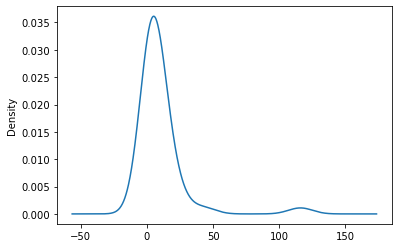

In [113]:
# Visualize the value counts of biz types
biz_cat.plot.density()

In [115]:
# Determine which values to replace if counts are less than 10
replace_biz = list(biz_cat[biz_cat < 8].index)

# Replace in dataframe
for biz in replace_biz:
    ml_df.biz_type = ml_df.biz_type.replace(biz,"Other")
    
# Check to make sure binning was successful
ml_df.biz_type.value_counts()

WINERY        116
Other          82
MULTIFAMIL     43
RESTAURANT     25
OFFICE BLD     22
VINEYARD       19
LODGING        15
RETAIL         12
CHURCH         12
LODGING-FW     11
MEDICAL        10
CONTRACTOR     10
UTILITY         9
SCHOOL          9
GROCERY         8
Name: biz_type, dtype: int64

In [116]:
# Generate the categorical variable lists
biz_list = ml_df.dtypes[ml_df.dtypes=='object'].index.tolist()

In [117]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(ml_df[biz_list]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(biz_list)
encode_df

,tax_body_C,tax_body_COUNTY,tax_body_S,tax_body_Y,biz_type_CHURCH,biz_type_CONTRACTOR,biz_type_GROCERY,biz_type_LODGING,biz_type_LODGING-FW,biz_type_MEDICAL,...,biz_type_OFFICE BLD,biz_type_Other,biz_type_RESTAURANT,biz_type_RETAIL,biz_type_SCHOOL,biz_type_UTILITY,biz_type_VINEYARD,biz_type_WINERY,enough_recycle_compost_No,enough_recycle_compost_Yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
399,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
401,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [119]:
# Merge one-hot encoded features and drop the originals
ml_df = ml_df.merge(encode_df, left_index=True, right_index=True)
ml_df = ml_df.drop(biz_list, 1)
ml_df

,monthly_bill,total_yards,garbage,recycle,needed_recycle,compost,needed_compost,tax_body_C_x,tax_body_COUNTY_x,tax_body_S_x,...,biz_type_OFFICE BLD_y,biz_type_Other_y,biz_type_RESTAURANT_y,biz_type_RETAIL_y,biz_type_SCHOOL_y,biz_type_UTILITY_y,biz_type_VINEYARD_y,biz_type_WINERY_y,enough_recycle_compost_No_y,enough_recycle_compost_Yes_y
98,888.98,20.00,4.0,16.00,2,0.00,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
218,965.40,9.92,4.0,5.44,2,0.48,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
345,890.40,4.00,4.0,0.00,2,0.00,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [120]:
# Split our preprocessed data into our features and target arrays
y = ml_df.enough_recycle_compost.values
X = ml_df.drop(columns=["enough_recycle_compost", "cust"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

AttributeError: 'DataFrame' object has no attribute 'enough_recycle_compost'

In [50]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train.shape); print(X_test.shape)

(155, 21)
(52, 21)


In [51]:
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# number_input_features = len(X_train_scaled[0])
# hidden_nodes_layer1 = 80
# hidden_nodes_layer2 = 30

# nn = tf.keras.models.Sequential()

# # First hidden layer
# nn.add(
#     tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="linear")
# )

# # Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="linear"))


# # Output layer
# nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# # Check the structure of the model
# nn.summary()

In [52]:
# mlp = MLPClassifier(hidden_layer_sizes=(22,22,22), activation='relu', solver='adam', max_iter=500)

# mlp.fit(X_train,y_train)

# predict_train = mlp.predict(X_train)

# predict_test = mlp.predict(X_test)

In [53]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="linear"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                440       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [55]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: -32.0009 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 1000us/step - loss: -84.0106 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: -109.6292 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: -111.3336 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 998us/step - loss: -114.3427 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 1000us/step - loss: -115.1391 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: -115.1875 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 750us/step - loss: -115.2235 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: -115.1405 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 1

5/5 [==============================] - 0s 1000us/step - loss: -114.6954 - accuracy: 0.0000e+00
Epoch 79/100
5/5 [==============================] - 0s 750us/step - loss: -114.6954 - accuracy: 0.0000e+00
Epoch 80/100
5/5 [==============================] - 0s 751us/step - loss: -114.6954 - accuracy: 0.0000e+00
Epoch 81/100
5/5 [==============================] - 0s 1ms/step - loss: -114.6954 - accuracy: 0.0000e+00
Epoch 82/100
5/5 [==============================] - 0s 750us/step - loss: -114.6954 - accuracy: 0.0000e+00
Epoch 83/100
5/5 [==============================] - 0s 750us/step - loss: -114.6954 - accuracy: 0.0000e+00
Epoch 84/100
5/5 [==============================] - 0s 1ms/step - loss: -114.6954 - accuracy: 0.0000e+00
Epoch 85/100
5/5 [==============================] - 0s 750us/step - loss: -114.6954 - accuracy: 0.0000e+00
Epoch 86/100
5/5 [==============================] - 0s 750us/step - loss: -114.6954 - accuracy: 0.0000e+00
Epoch 87/100
5/5 [==============================] - 0